## 1) Problem Statement
• This project understands how the student's performance (Test Scores) is affected by other variables such as Gender, Ethnicity, Parental level of Education,Lunch and Test preparation course.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.shape

(1000, 8)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Checks to Perform:
1. Check Missing Values
2. Check Duplicates
3. Check Data type
4. Check the number of unique values of each column
5. Check statistics of the data
6. Check various categories present in the different categorical column

In [10]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### No NULL values

In [14]:
df.duplicated().sum()

np.int64(0)

#### NO DUPLICATE DATA FOUND IN THE DATASET

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [17]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights from the statistics

Metric: Meaning<br> 
count: Number of data points (1000 students in this case). <br>
mean: The average score across all students.<br>
std (Standard Deviation): Measures the spread of scores; higher values indicate more variation.<br>
min: The lowest score in the dataset.<br>
25%: (Q1 - First Quartile)	25% of students scored below this value.<br>
50%: (Q2 - Median)	The middle score when sorted in ascending order.<br>
75%: (Q3 - Third Quartile)	75% of students scored below this value.<br>
max: The highest score in the dataset.<br>

1. All means are very close to each other (66.08 - 69.16)
2. The standard deviation is also very close (14.60 - 15.19)
3. the min. score for maths is 0 but for reading and writing it is much higher.

### categorical features

In [ ]:
print("Categories in 'Gender' variable: ", end = " " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end = " " )
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end = " " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end = " " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end = " " )
print(df['test preparation course'].unique())

Categories in 'Gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [20]:
## define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


## print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Adding new columns for total scores and average scores

In [21]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')



Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [23]:
reading_lessthan_40 = df[df['reading score'] <= 40]['average score'].count()
writing_lessthan_40 = df[df['writing score'] <= 40]['average score'].count()
math_lessthan_40 = df[df['math score'] <= 40]['average score'].count()

print(f'Number of students with marks less than 40 in Maths: {math_lessthan_40}')
print(f'Number of students with marks less than 40 in Writing: {writing_lessthan_40}')
print(f'Number of students with marks less than 40 in Reading: {reading_lessthan_40}')

Number of students with marks less than 40 in Maths: 50
Number of students with marks less than 40 in Writing: 35
Number of students with marks less than 40 in Reading: 27


### Exploring Data (Visualization)
1. Visualize average score distribution to make some conclusion.<br>
    1.1 Histogram<br>
    1.2 Kernel Distribution Function (KDE)<br>

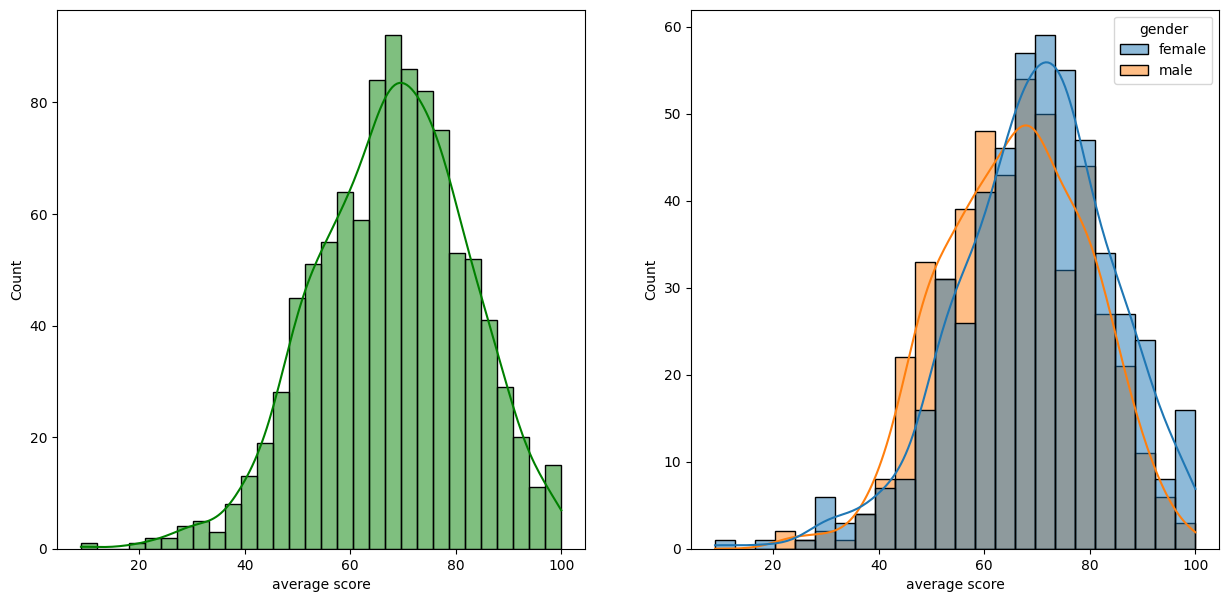

In [37]:
### Histogram and KDE
fig,axs = plt.subplots(1,2,figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average score', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

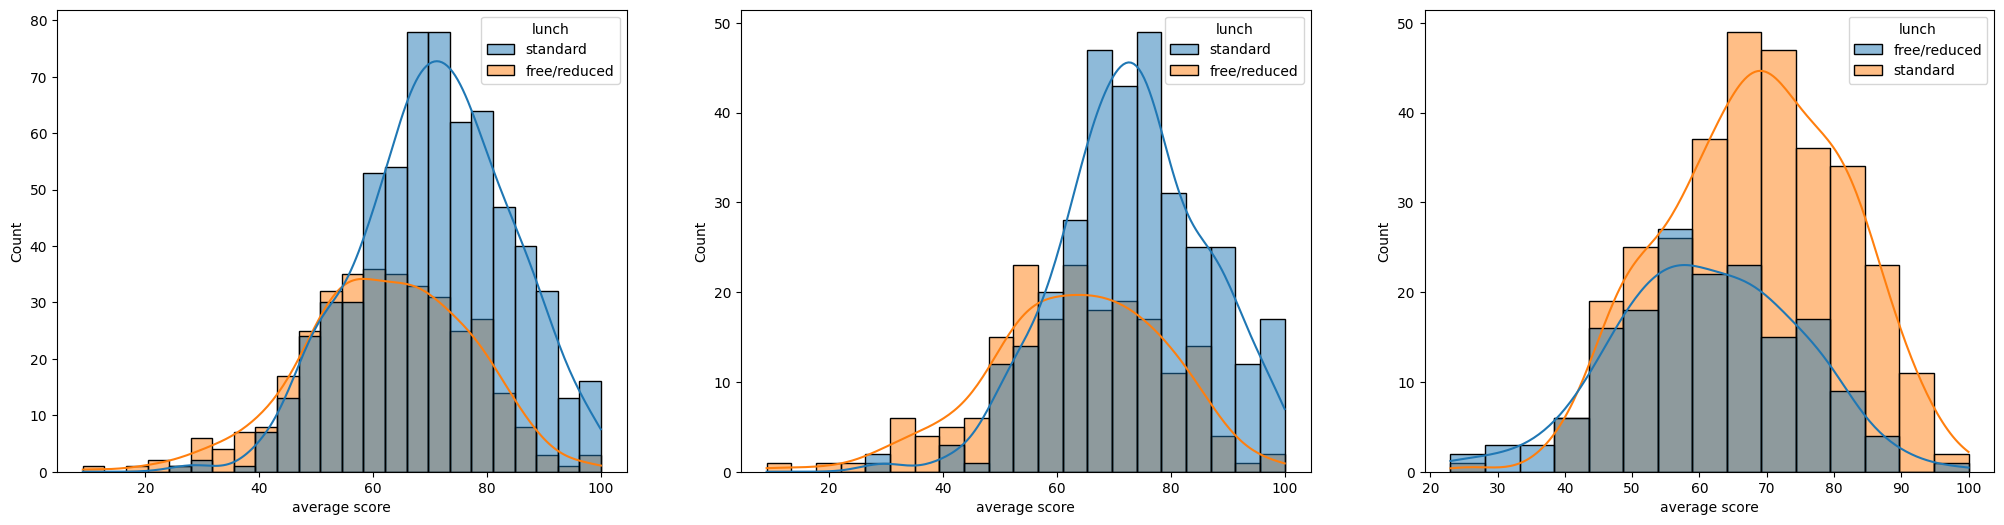

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.show()

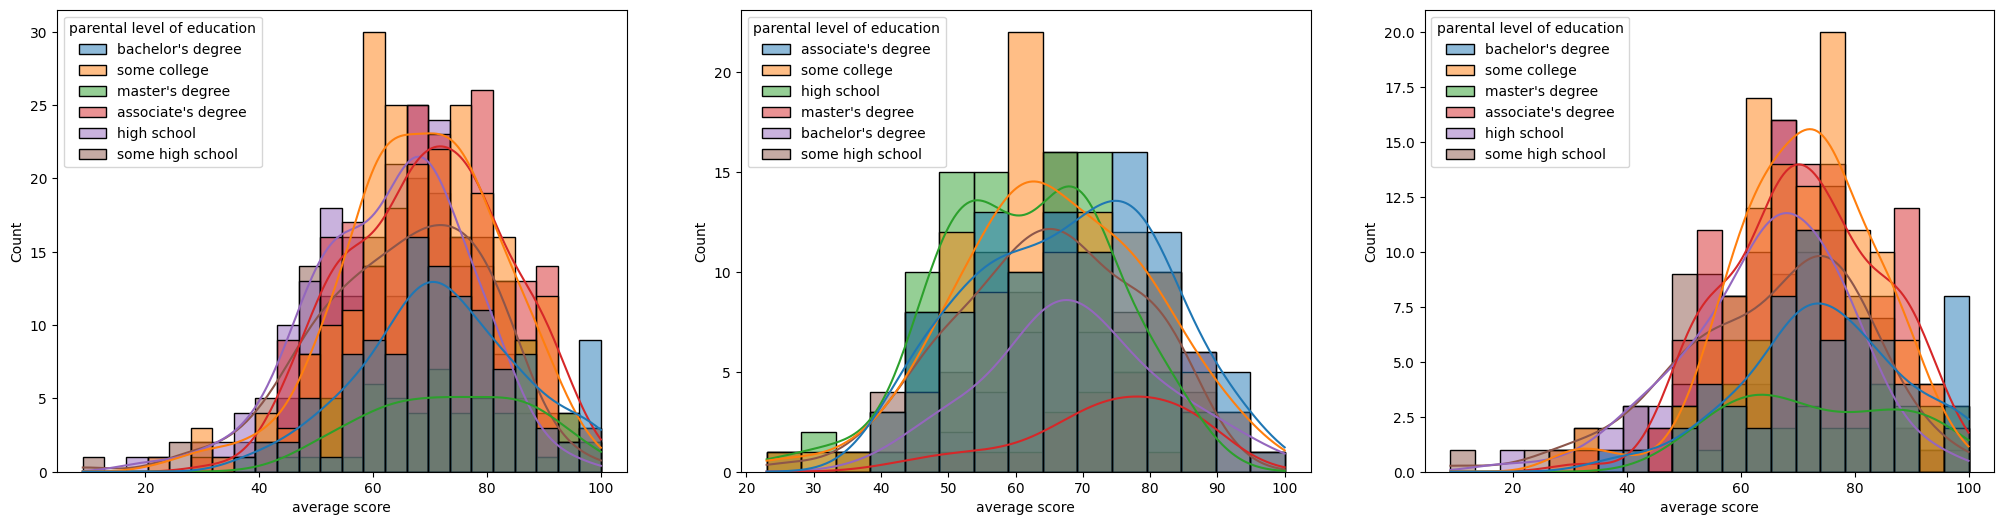

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.show()

### Insights
1. In general parent's education don't help student perform well in exam.
2. 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3. 3rd plot we can see there is no effect of parent's education on female students.

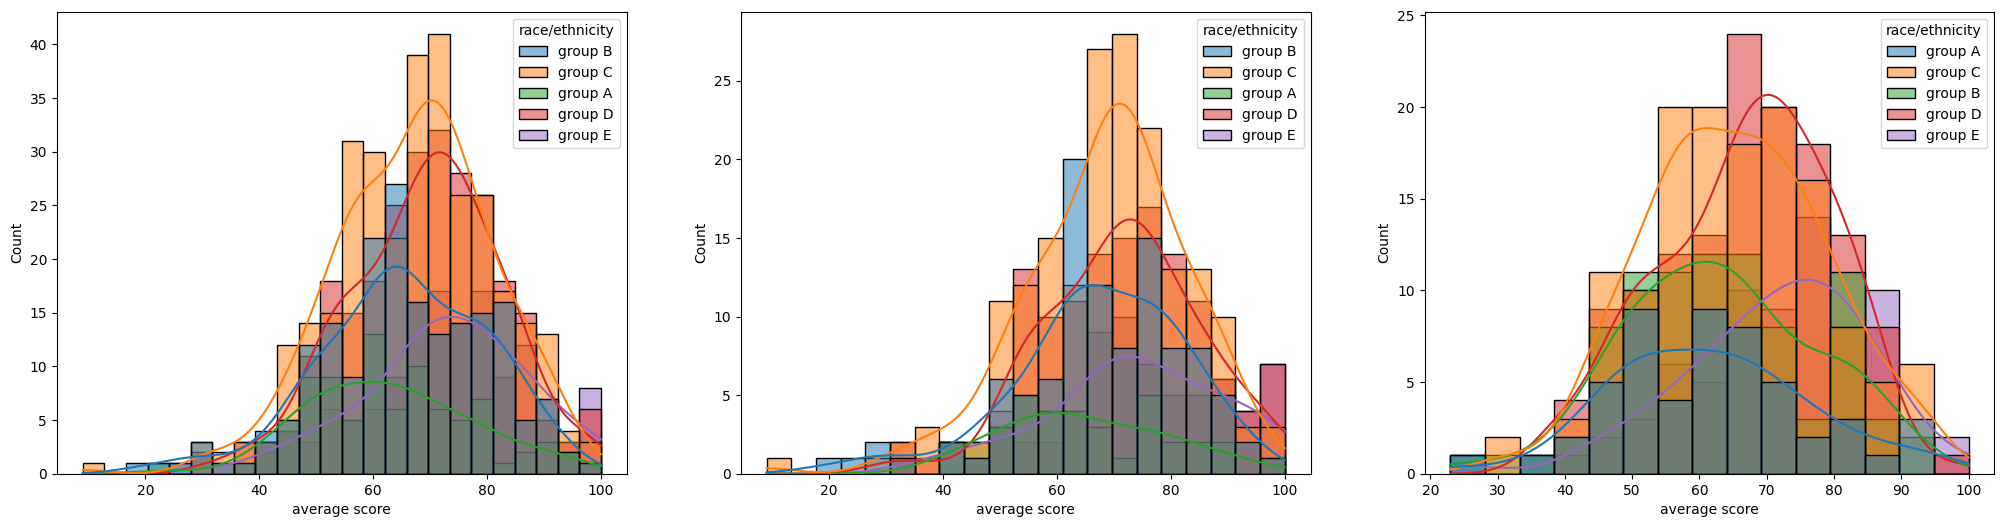

In [43]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')
plt.show()

### Insights
1. Students of group A and group B tends to perform poorly in exam.
2. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

## Multivariate results using pieplot

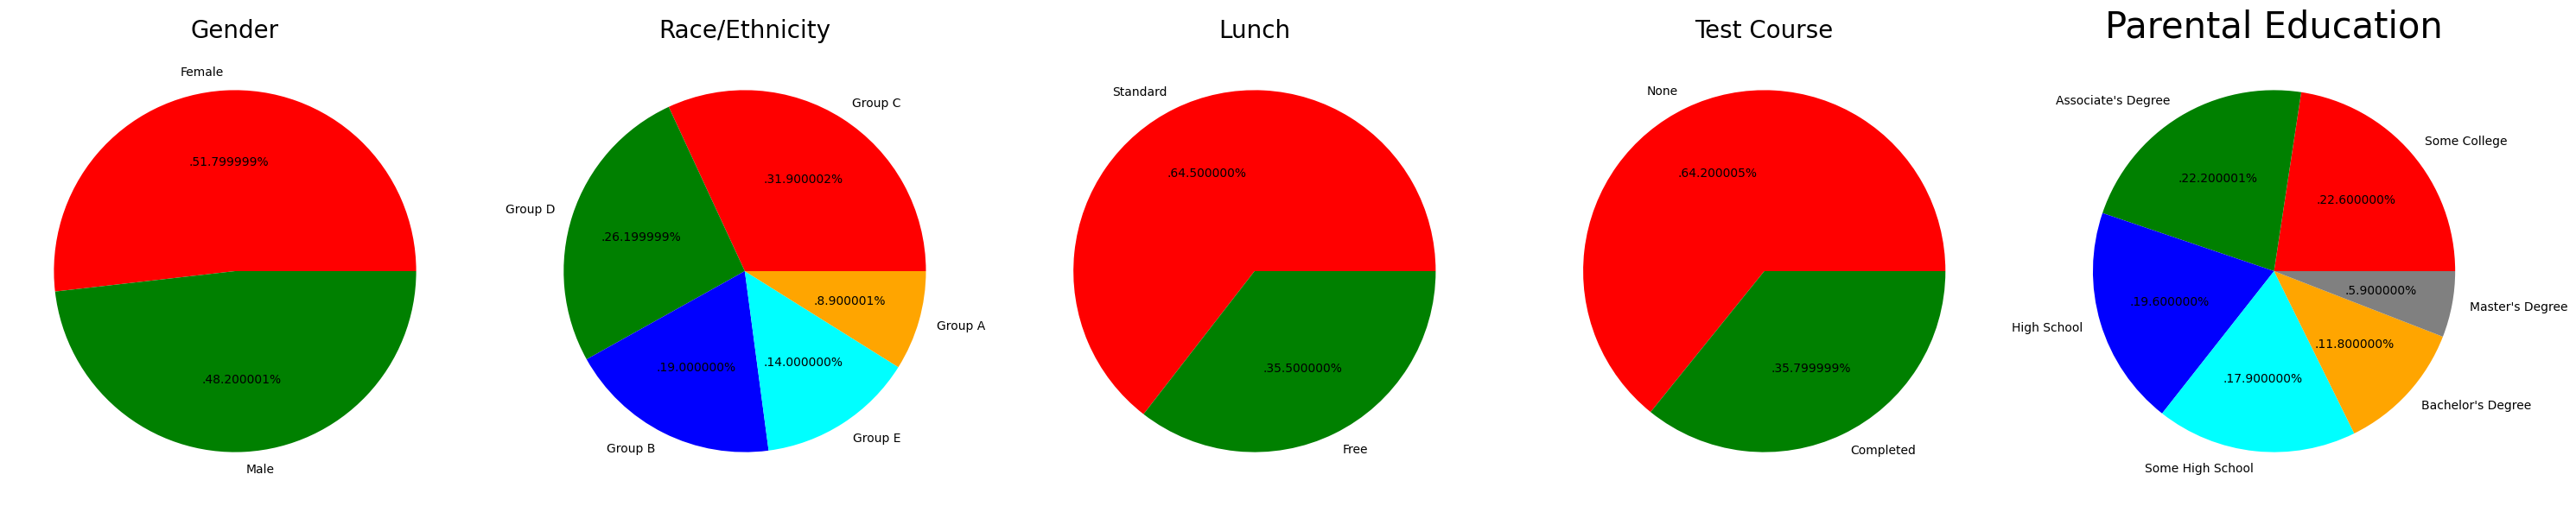

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
1. Number of Male and Female students is almost equal
2. Number students are greatest in Group C
3. Number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preparation course is greater
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### checking outliers

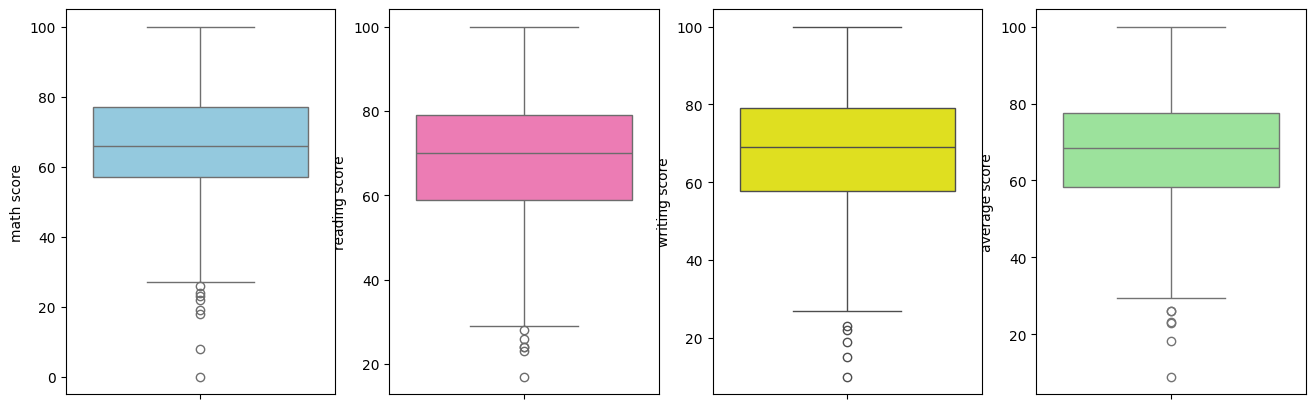

In [46]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()